# Homework no.4 Machine Learning
**Student Name:** Mohammad Amin Dadgar <br>
**Student Id:** 4003624016

In [1]:
## importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Q1
Using MNIST dataset implement multi-layer neural networks and report the accuracy of the classification with requested properties.
- Train a neural network with 1, 2 and 3 layers.
- Use different neuron counts in each layer, ex: 16, 32, 64
- Use `mse` and `cross_entropy` for loss function.
- Use the activation functions `relu`, `tanh` and `sigmoid`.

## Answer

### Loading the MNIST dataset

In [2]:
## Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
y_train_binray_vec = keras.utils.to_categorical(y_train)
y_test_binray_vec = keras.utils.to_categorical(y_test)

y_train_binray_vec[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Creating one layer network with Fully Connected layer

In [58]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(input_shape,)))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


The parameters are calculated as `28*28*13 + 13`, which 13 is our bias count.

In [59]:
## reshape the images because we are going to use them as an input of a dense layer
x_train_reshaped = tf.reshape(x_train, (x_train.shape[0], input_shape))
x_test_reshaped = tf.reshape(x_test, (x_test.shape[0], input_shape))

x_train_reshaped.shape, x_test_reshaped.shape

(TensorShape([60000, 784]), TensorShape([10000, 784]))

In [61]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_one_layer = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.4950 - accuracy: 0.8921 - val_loss: 2.5711 - val_accuracy: 0.8965
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 2.5098 - accuracy: 0.8911 - val_loss: 2.5870 - val_accuracy: 0.8928
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 2.4593 - accuracy: 0.8930 - val_loss: 3.0469 - val_accuracy: 0.8945
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3475 - accuracy: 0.8934 - val_loss: 2.6333 - val_accuracy: 0.8992
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3496 - accuracy: 0.8925 - val_loss: 2.3867 - val_accuracy: 0.9040
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3183 - accuracy: 0.8947 - val_loss: 2.4677 - val_accuracy: 0.9023
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3999 - accuracy: 0.8930 - val_loss: 2.7233 - val_accuracy: 0.8983
Epoch 

In [129]:
## plotting the train history
# plt.plot(history_one_layer)

def plot_history(history, ax1_keys=['accuracy', 'val_accuracy'], ax2_keys=['loss', 'val_loss']):
    """
    Plot the Losses and Accuracies of training history using two subplots in a row
    
    Parameters:
    ------------
    history : dictionary
        the history of training returned by mode.fit in tensorflow neural network
    ax1_keys : string array
        array of the keys in history to be plotted for the first plot
        default is `['accuracy', 'val_accuracy']`
    ax2_keys : string array
        array of the keys in history to be plotted for the second plot
        default is `['loss', 'val_loss']`
    """

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    axes[0].plot(history.history[ax1_keys[0]])
    axes[0].plot(history.history[ax1_keys[1]])
    axes[0].legend(ax1_keys)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy Value')

    axes[1].plot(history.history[ax2_keys[0]])
    axes[1].plot(history.history[ax2_keys[1]])
    axes[1].legend(ax2_keys)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss Value')

    plt.show()
    
plot_history(history_one_layer)

NameError: name 'history_one_layer' is not defined

### Creating two layer network with Fully Connected layer

In [72]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [73]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_two_layer = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 4.8503 - accuracy: 0.8620 - val_loss: 1.0899 - val_accuracy: 0.9157
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.7532 - accuracy: 0.9046 - val_loss: 0.5583 - val_accuracy: 0.9060
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.9221 - val_loss: 0.4070 - val_accuracy: 0.9285
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2786 - accuracy: 0.9380 - val_loss: 0.3531 - val_accuracy: 0.9388
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2140 - accuracy: 0.9486 - val_loss: 0.3395 - val_accuracy: 0.9420
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1769 - accuracy: 0.9564 - val_loss: 0.3007 - val_accuracy: 0.9450
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1604 - accuracy: 0.9594 - val_loss: 0.2821 - val_accuracy: 0.9483
Epoch 

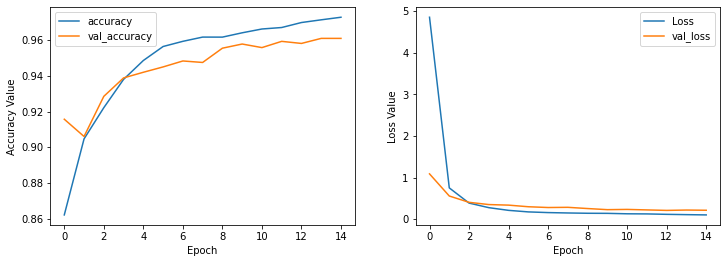

In [97]:
plot_history(history_two_layer)

### Creating a three layer network with Fully Connected layer


In [81]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='relu', ))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [82]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_three_layer = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.7456 - accuracy: 0.8495 - val_loss: 0.6261 - val_accuracy: 0.9173
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.4747 - accuracy: 0.9233 - val_loss: 0.3464 - val_accuracy: 0.9427
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.9432 - val_loss: 0.2914 - val_accuracy: 0.9453
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9556 - val_loss: 0.2557 - val_accuracy: 0.9495
Epoch 5/15
422/422 [==============================] - 1s 4ms/step - loss: 0.1514 - accuracy: 0.9618 - val_loss: 0.2171 - val_accuracy: 0.9575
Epoch 6/15
422/422 [==============================] - 1s 4ms/step - loss: 0.1296 - accuracy: 0.9657 - val_loss: 0.2458 - val_accuracy: 0.9578
Epoch 7/15
422/422 [==============================] - 1s 4ms/step - loss: 0.1150 - accuracy: 0.9697 - val_loss: 0.2395 - val_accuracy: 0.9592
Epoch 

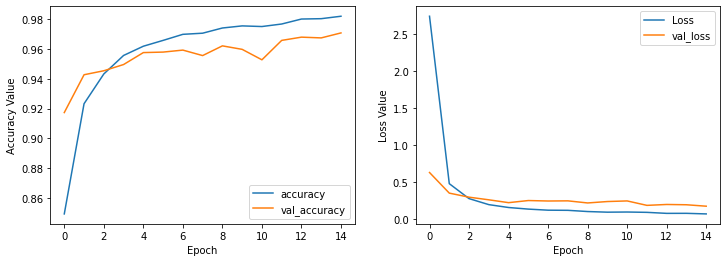

In [98]:
plot_history(history_three_layer)

Let's see how `softmax` activation function works in our three layer network.(If we apply `softmax` function on all the layers)

In [84]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='softmax', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='softmax', ))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [85]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_three_layer_softmax_applied = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.2584 - accuracy: 0.2709 - val_loss: 2.1583 - val_accuracy: 0.6877
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 1.9198 - accuracy: 0.6935 - val_loss: 1.5972 - val_accuracy: 0.7358
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 1.3641 - accuracy: 0.7059 - val_loss: 1.0940 - val_accuracy: 0.7348
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 1.0376 - accuracy: 0.7140 - val_loss: 0.9237 - val_accuracy: 0.7332
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.9187 - accuracy: 0.7205 - val_loss: 0.9217 - val_accuracy: 0.7102
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8659 - accuracy: 0.7214 - val_loss: 0.8921 - val_accuracy: 0.7103
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8235 - accuracy: 0.7226 - val_loss: 0.7432 - val_accuracy: 0.7385
Epoch 

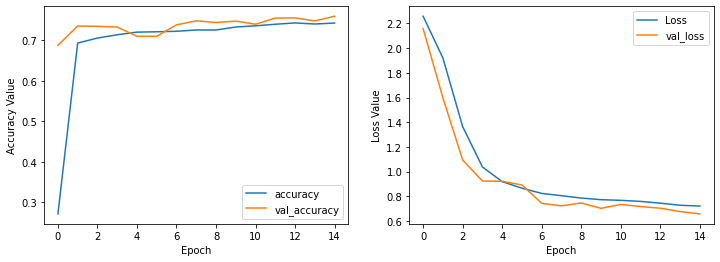

In [99]:
plot_history(history_three_layer_softmax_applied)

We can see that using the `softmax` activation function for all layers can achieve much better performance than before, And we can conclude that the `softmax` activation function can represent and save the pixels information way better than `relu`.

Let's apply the `tanh` activation function for our well behaved three layer network and see the results.

In [87]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='tanh', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='tanh', ))
model.add(keras.layers.Dense(10, activation='tanh'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               100480    
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [88]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_three_layer_tanh_applied = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 7.9846 - accuracy: 0.1421 - val_loss: 6.6503 - val_accuracy: 0.1108
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 7.2211 - accuracy: 0.1014 - val_loss: 7.5003 - val_accuracy: 0.1233
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 7.8166 - accuracy: 0.1290 - val_loss: 7.9597 - val_accuracy: 0.1523
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 8.1841 - accuracy: 0.1425 - val_loss: 7.9570 - val_accuracy: 0.1528
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 8.1642 - accuracy: 0.1446 - val_loss: 7.6170 - val_accuracy: 0.1545
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 7.8573 - accuracy: 0.1026 - val_loss: 7.8253 - val_accuracy: 0.0835
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 8.0590 - accuracy: 0.0797 - val_loss: 7.8253 - val_accuracy: 0.0835
Epoch 

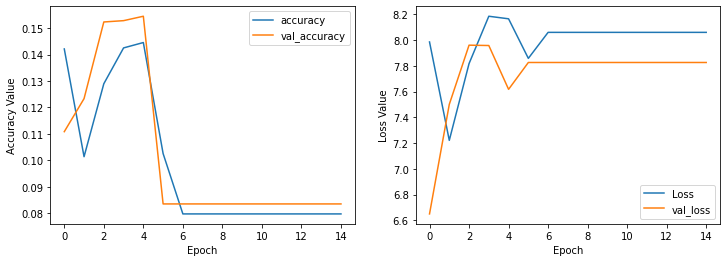

In [100]:
plot_history(history_three_layer_tanh_applied)

So we could see that the `tanh` activation function also does not have comparable results to `softmax` activation function. To have a final result in question 1 we can say that using the `softmax` activation function can get us to a good accuracy.

# Q2

## Question
Using the imdb dataset try the steps in question 1 and also for tuning try validation dataset.
## Answer

In [51]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data()

First Let's have a look at the dataset.

In [52]:
x_train.shape

(25000,)

In [53]:
x_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [54]:
## let's see does each item have same length or not
len(x_train[0]), len(x_train[1])

(218, 189)

The description of IMDB datset written in keras docs is as below

`This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).
For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as:
"only consider the top 10,000 most
common words, but eliminate the top 20 most common words".
As a convention, "0" does not stand for a specific word, but instead is used
to encode any unknown word.`

So for the EDA step, we will create each sample's length 2500, in order to have same sample lengths. (because the higest sample length is near 2500, we found it by while coding and got errors)

In [91]:
def modify_dataset(dataset_x, max_length=2500):
    """
    modify each word in dataset by creating a vector for each sample with 1000 length count.
    
    Parameters:
    -----------
    dataset_x : 2D array
        array of vectors representing each data
    max_length : integer
        max_length of each vector
        default is 1000
    
    Returns:
    --------
    modified_dataset_x : 2D array
        the modified dataset with the same length of original dataset but having the same length for each item too
    """
    modified_dataset_x = np.zeros((len(dataset_x) , max_length))
    for idx, sample in enumerate(x_train):
        modified_dataset_x[idx][:len(sample)] = sample
    
    return modified_dataset_x

In [94]:
x_train = modify_dataset(x_train)
x_test = modify_dataset(x_test)

x_train.shape, x_test.shape

((25000, 2500), (25000, 2500))

In [159]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

It seems that there is no need to categorize the output because the output value for each data is having length one.

to create one layer network because our outputs are length 1, one neuron must be applied, so we're using two layer network to get better performance. In the first layer we are using 512 neurons with softmax activation function. 

because we know in the input each sample size is 2500, we put 2500 nerons in the input layer.

In [122]:
model_imdb = keras.Sequential()
model_imdb.add(keras.layers.Dense(2500, activation='softmax', input_shape=(2500, )))
model_imdb.add(keras.layers.Dense(1, activation='relu', input_shape=(2500, )))


model_imdb.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_17 (Dense)            (None, 1)                 2501      
                                                                 
Total params: 6,255,001
Trainable params: 6,255,001
Non-trainable params: 0
_________________________________________________________________


In [123]:
model_imdb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()], )

In [124]:
history_model_imdb = model_imdb.fit(
    x_train , 
    y_train, 
    batch_size=32, 
    epochs=15, 
    validation_split=0.1
)

Epoch 1/15
704/704 [==============================] - 5s 7ms/step - loss: 1.2789 - binary_accuracy: 0.4986 - false_negatives_11: 11281.0000 - val_loss: 0.8314 - val_binary_accuracy: 0.5124 - val_false_negatives_11: 1219.0000
Epoch 2/15
704/704 [==============================] - 5s 7ms/step - loss: 0.7179 - binary_accuracy: 0.4996 - false_negatives_11: 7815.0000 - val_loss: 0.7085 - val_binary_accuracy: 0.4880 - val_false_negatives_11: 27.0000
Epoch 3/15
704/704 [==============================] - 5s 6ms/step - loss: 0.7037 - binary_accuracy: 0.4966 - false_negatives_11: 5514.0000 - val_loss: 0.6981 - val_binary_accuracy: 0.4996 - val_false_negatives_11: 87.0000
Epoch 4/15
704/704 [==============================] - 5s 7ms/step - loss: 0.6954 - binary_accuracy: 0.4994 - false_negatives_11: 3102.0000 - val_loss: 0.6930 - val_binary_accuracy: 0.5124 - val_false_negatives_11: 1219.0000
Epoch 5/15
704/704 [==============================] - 5s 7ms/step - loss: 0.6952 - binary_accuracy: 0.5056 

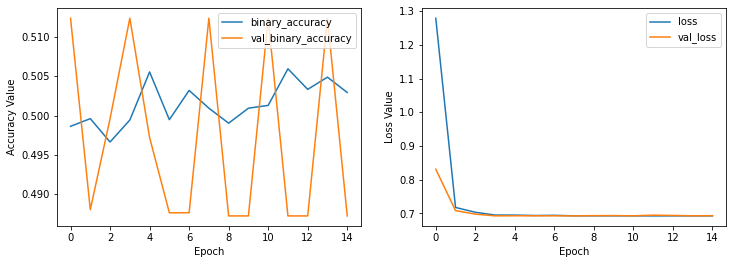

In [130]:
plot_history(history_model_imdb, 
             ax1_keys=['binary_accuracy', 'val_binary_accuracy'], 
             ax2_keys=['loss', 'val_loss'])

With this values we can easily find out the model is underfitted and is not working properly. So we will try another network with 3 layers to see how the performance change.

In [134]:
model_imdb2 = keras.Sequential()
model_imdb2.add(keras.layers.Dense(2500, activation='softmax', input_shape=(2500, )))
model_imdb2.add(keras.layers.Dense(512, activation='relu', input_shape=(2500, )))
model_imdb2.add(keras.layers.Dense(1, activation='relu', input_shape=(2500, )))



model_imdb2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_22 (Dense)            (None, 512)               1280512   
                                                                 
 dense_23 (Dense)            (None, 1)                 513       
                                                                 
Total params: 7,533,525
Trainable params: 7,533,525
Non-trainable params: 0
_________________________________________________________________


In [135]:
model_imdb2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()], )

In [136]:
history_model_imdb2 = model_imdb2.fit(
    x_train , 
    y_train, 
    batch_size=32, 
    epochs=15, 
    validation_split=0.1
)

Epoch 1/15
704/704 [==============================] - 6s 8ms/step - loss: 0.7177 - binary_accuracy: 0.4964 - false_negatives_13: 6128.0000 - val_loss: 0.6927 - val_binary_accuracy: 0.4952 - val_false_negatives_13: 75.0000
Epoch 2/15
704/704 [==============================] - 5s 8ms/step - loss: 0.6962 - binary_accuracy: 0.4943 - false_negatives_13: 5391.0000 - val_loss: 0.6939 - val_binary_accuracy: 0.4852 - val_false_negatives_13: 23.0000
Epoch 3/15
704/704 [==============================] - 6s 8ms/step - loss: 0.6955 - binary_accuracy: 0.4952 - false_negatives_13: 5491.0000 - val_loss: 0.6942 - val_binary_accuracy: 0.4872 - val_false_negatives_13: 36.0000
Epoch 4/15
704/704 [==============================] - 7s 10ms/step - loss: 0.6951 - binary_accuracy: 0.4972 - false_negatives_13: 5806.0000 - val_loss: 0.6926 - val_binary_accuracy: 0.5156 - val_false_negatives_13: 1184.0000
Epoch 5/15
704/704 [==============================] - 6s 8ms/step - loss: 0.6953 - binary_accuracy: 0.4995 - 

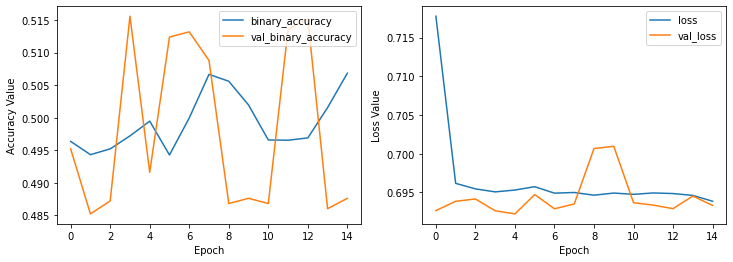

In [140]:
plot_history(history_model_imdb2, 
             ax1_keys=['binary_accuracy', 'val_binary_accuracy'], 
             ax2_keys=['loss', 'val_loss'])

It seems making a deeper neural network doesn't work for us. Let's change `relu` transfer function, maybe we're losing information because of choosing wrong activation function.

In [138]:
model_imdb3 = keras.Sequential()
model_imdb3.add(keras.layers.Dense(2500, activation='softmax', input_shape=(2500, )))
model_imdb3.add(keras.layers.Dense(512, activation='softmax', input_shape=(2500, )))
model_imdb3.add(keras.layers.Dense(1, activation='softmax', input_shape=(2500, )))



model_imdb3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_28 (Dense)            (None, 512)               1280512   
                                                                 
 dense_29 (Dense)            (None, 1)                 513       
                                                                 
Total params: 7,533,525
Trainable params: 7,533,525
Non-trainable params: 0
_________________________________________________________________


In [139]:
model_imdb3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()], )

In [141]:
history_model_imdb3 = model_imdb3.fit(
    x_train , 
    y_train, 
    batch_size=32, 
    epochs=15, 
    validation_split=0.1
)

Epoch 1/15
704/704 [==============================] - 6s 8ms/step - loss: 0.6931 - binary_accuracy: 0.5014 - false_negatives_14: 0.0000e+00 - val_loss: 0.6931 - val_binary_accuracy: 0.4876 - val_false_negatives_14: 0.0000e+00
Epoch 2/15
704/704 [==============================] - 5s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5014 - false_negatives_14: 0.0000e+00 - val_loss: 0.6938 - val_binary_accuracy: 0.4876 - val_false_negatives_14: 0.0000e+00
Epoch 3/15
704/704 [==============================] - 5s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5014 - false_negatives_14: 0.0000e+00 - val_loss: 0.6929 - val_binary_accuracy: 0.4876 - val_false_negatives_14: 0.0000e+00
Epoch 4/15
704/704 [==============================] - 5s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5014 - false_negatives_14: 0.0000e+00 - val_loss: 0.6935 - val_binary_accuracy: 0.4876 - val_false_negatives_14: 0.0000e+00
Epoch 5/15
704/704 [==============================] - 5s 8ms/step - loss: 0.6932 - binary_accura

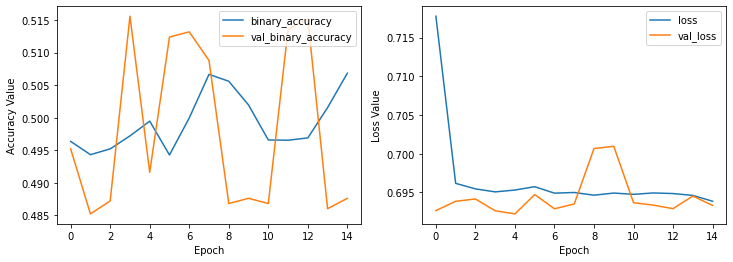

In [143]:
plot_history(history_model_imdb2, 
             ax1_keys=['binary_accuracy', 'val_binary_accuracy'], 
             ax2_keys=['loss', 'val_loss'])

Again it doesn't work changing the activation functions. Let's create a deeper network with different neurons count.

In [153]:
model_imdb4 = keras.Sequential()
model_imdb4.add(keras.layers.Dense(2500, activation='softmax', input_shape=(2500, )))
model_imdb4.add(keras.layers.Dense(1024, activation='relu', input_shape=(2500, )))
model_imdb4.add(keras.layers.Dense(512, activation='relu', input_shape=(2500, )))
model_imdb4.add(keras.layers.Dense(256, activation='relu', input_shape=(2500, )))
model_imdb4.add(keras.layers.Dense(128, activation='relu', input_shape=(2500, )))
model_imdb4.add(keras.layers.Dense(1, activation='relu', input_shape=(2500, )))



model_imdb4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_37 (Dense)            (None, 1024)              2561024   
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dense_41 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,502,677
Trainable params: 9,502,677
N

In [156]:
## Let's have a high learning rate to see how good it can perform in low count iterations
## having high learning rate can cause to near random results and we want that to see how good it can perform 
model_imdb4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()], )

In [157]:
history_model_imdb4 = model_imdb4.fit(
    x_train , 
    y_train, 
    batch_size=32, 
    epochs=15, 
    validation_split=0.1
)

Epoch 1/15
704/704 [==============================] - 7s 9ms/step - loss: 7.7265 - binary_accuracy: 0.4985 - false_negatives_20: 11279.0000 - val_loss: 7.5212 - val_binary_accuracy: 0.5124 - val_false_negatives_20: 1219.0000
Epoch 2/15
704/704 [==============================] - 6s 9ms/step - loss: 7.7337 - binary_accuracy: 0.4986 - false_negatives_20: 11281.0000 - val_loss: 7.5212 - val_binary_accuracy: 0.5124 - val_false_negatives_20: 1219.0000
Epoch 3/15
704/704 [==============================] - 6s 9ms/step - loss: 7.7337 - binary_accuracy: 0.4986 - false_negatives_20: 11281.0000 - val_loss: 7.5212 - val_binary_accuracy: 0.5124 - val_false_negatives_20: 1219.0000
Epoch 4/15
704/704 [==============================] - 6s 9ms/step - loss: 7.7337 - binary_accuracy: 0.4986 - false_negatives_20: 11281.0000 - val_loss: 7.5212 - val_binary_accuracy: 0.5124 - val_false_negatives_20: 1219.0000
Epoch 5/15
704/704 [==============================] - 6s 9ms/step - loss: 7.7337 - binary_accuracy: 

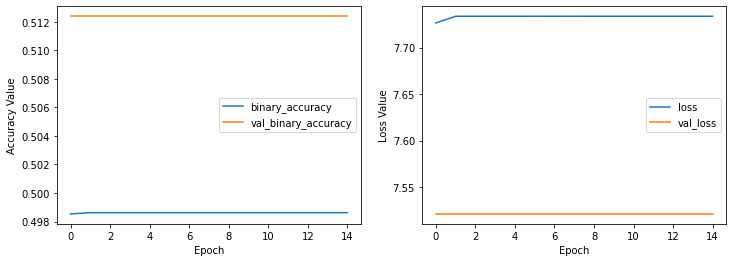

In [158]:
plot_history(history_model_imdb4, 
             ax1_keys=['binary_accuracy', 'val_binary_accuracy'], 
             ax2_keys=['loss', 'val_loss'])

It is not performing well again! So we need to use other layer types to achieve better performance. 

Maybe categorizing the output values can help us to get a better performance. Because the output values was length one we had to force the output layer to have one neuron and categorizing it can create two values for each output (So we set output nurons to 2).

In [160]:
y_train_categorized = keras.utils.to_categorical(y_train)
y_test_categorized = keras.utils.to_categorical(y_test)

In [166]:
model_imdb5 = keras.Sequential()
model_imdb5.add(keras.layers.Dense(2500, activation='softmax', input_shape=(2500, )))
model_imdb5.add(keras.layers.Dense(1024, activation='relu', input_shape=(2500, )))
model_imdb5.add(keras.layers.Dense(512, activation='relu', input_shape=(2500, )))
model_imdb5.add(keras.layers.Dense(256, activation='relu', input_shape=(2500, )))
model_imdb5.add(keras.layers.Dense(128, activation='relu', input_shape=(2500, )))
model_imdb5.add(keras.layers.Dense(2, activation='relu', input_shape=(2500, )))


model_imdb5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()], )

history_model_imdb5 = model_imdb5.fit(
    x_train,
    y_train_categorized, 
    batch_size=32, 
    epochs=15, 
    validation_split=0.1
)

Epoch 1/15
704/704 [==============================] - 7s 9ms/step - loss: 4.2024 - binary_accuracy: 0.4999 - false_negatives_24: 17616.0000 - val_loss: 4.3118 - val_binary_accuracy: 0.4876 - val_false_negatives_24: 1283.0000
Epoch 2/15
704/704 [==============================] - 6s 9ms/step - loss: 4.1946 - binary_accuracy: 0.4986 - false_negatives_24: 17285.0000 - val_loss: 4.2982 - val_binary_accuracy: 0.5012 - val_false_negatives_24: 2476.0000
Epoch 3/15
704/704 [==============================] - 6s 9ms/step - loss: 4.1943 - binary_accuracy: 0.4990 - false_negatives_24: 17456.0000 - val_loss: 4.2999 - val_binary_accuracy: 0.4876 - val_false_negatives_24: 1281.0000
Epoch 4/15
704/704 [==============================] - 6s 9ms/step - loss: 4.1930 - binary_accuracy: 0.5030 - false_negatives_24: 16756.0000 - val_loss: 4.2983 - val_binary_accuracy: 0.5006 - val_false_negatives_24: 2483.0000
Epoch 5/15
704/704 [==============================] - 6s 9ms/step - loss: 4.1929 - binary_accuracy: 

Until now we tried a lot to get a good performance with dense layers in imdb dataset, but it seems this kind of networks cannot perform well in this situation and we must try other leyers (Here the dense layers can just perform as a random classifier).